In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

directory = '/content/drive/My Drive/Colab Notebooks/'

In [ ]:
meta_batch = unpickle(directory + 'batches.meta')
c10_label_names = np.array(meta_batch[b'label_names'])

#Decoding to unicode
c10_label_names = c10_label_names.astype('U13')
print(c10_label_names)

pathnames = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5','test_batch']
"""data_batch1 = unpickle(directory + 'data_batch_1')
data_batch2 = unpickle(directory + 'data_batch_2')
data_batch3 = unpickle(directory + 'data_batch_3')
data_batch4 = unpickle(directory + 'data_batch_4')
data_batch5 = unpickle(directory + 'data_batch_5')
test_batch = unpickle(directory + 'test_batch')"""

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


"data_batch1 = unpickle(directory + 'data_batch_1')\ndata_batch2 = unpickle(directory + 'data_batch_2')\ndata_batch3 = unpickle(directory + 'data_batch_3')\ndata_batch4 = unpickle(directory + 'data_batch_4')\ndata_batch5 = unpickle(directory + 'data_batch_5')\ntest_batch = unpickle(directory + 'test_batch')"

In [ ]:
#Making a list over the labelnames with respect to the images in the databatches

"""label_idxs_1 = data_batch1[b'labels']
label_idxs_2 = data_batch2[b'labels']
label_idxs_3 = data_batch3[b'labels']
label_idxs_4 = data_batch4[b'labels']
label_idxs_5 = data_batch5[b'labels']
label_idxs_test = test_batch[b'labels']"""

def make_label_list(idxs, lbl_names):
  lbl_list = []
  for i in range(len(idxs)):
    lbl_list.append(lbl_names[idxs[i]])
  return lbl_list

"""lable_names_1 = make_label_list(label_idxs_1, c10_label_names)
print(lable_names_1)
lable_names_2 = make_label_list(label_idxs_2, c10_label_names)
lable_names_3 = make_label_list(label_idxs_3, c10_label_names)
lable_names_4 = make_label_list(label_idxs_4, c10_label_names)
lable_names_5 = make_label_list(label_idxs_5, c10_label_names)"""

'lable_names_1 = make_label_list(label_idxs_1, c10_label_names)\nprint(lable_names_1)\nlable_names_2 = make_label_list(label_idxs_2, c10_label_names)\nlable_names_3 = make_label_list(label_idxs_3, c10_label_names)\nlable_names_4 = make_label_list(label_idxs_4, c10_label_names)\nlable_names_5 = make_label_list(label_idxs_5, c10_label_names)'

In [ ]:
def merge_data(directory, pathnames):
  data_dict = {}
  train_data = np.array([])
  train_labels = np.array([])
  for i in range(len(pathnames)):
    data_dict = unpickle(directory + pathnames[i])
    if i == 0:
      train_data = data_dict[b'data']
      train_labels = data_dict[b'labels']
    else:
      train_data = np.vstack((train_data, data_dict[b'data']))
      train_labels = np.concatenate((train_labels, data_dict[b'labels']))
  return train_data, train_labels

td, tl = merge_data(directory, pathnames)

print(td.shape)
print("Should be (60000, 3072)")
print(len(tl))
print("Should be 60000")

label_names = make_label_list(tl, c10_label_names)
print(len(label_names))
print("Should be 60000")

(60000, 3072)
Should be (60000, 3072)
60000
Should be 60000
60000
Should be 60000


Length of databatch: 10000


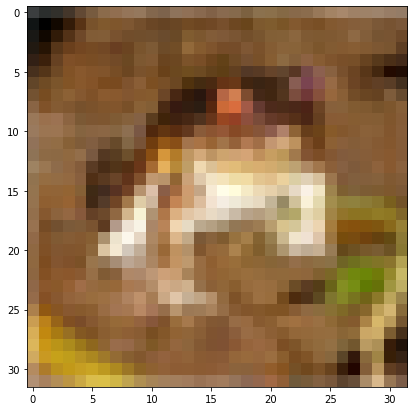

In [ ]:
#Reshaping by using numpys reshape function
print("Length of databatch:",len(td[:10000]))
image_data_1 = np.reshape(td[:10000], (len(td[:10000]), 3, 32, 32))

#Change the positions of the axis such that the rgb values is in the most inner array
image_data_rgb_1 = np.rollaxis(image_data_1, 1, 4)

#Plotting the image after reshaping correctly to confirm success:
image_data_0_plot = plt.figure(figsize=(10,7))
plt.imshow(image_data_rgb_1[0])

In [ ]:
def data_img_reshape(tot_data):
  #Reshaping by using numpys reshape function
  print("Length of databatch:",len(tot_data))
  image_data = np.reshape(tot_data, (len(tot_data), 3, 32, 32))

  #Change the positions of the axis such that the rgb values is in the most inner array
  image_data_rgb = np.rollaxis(image_data, 1, 4)
  return image_data_rgb

In [ ]:
td_img = data_img_reshape(td)

Length of databatch: 60000


<Figure size 432x288 with 0 Axes>

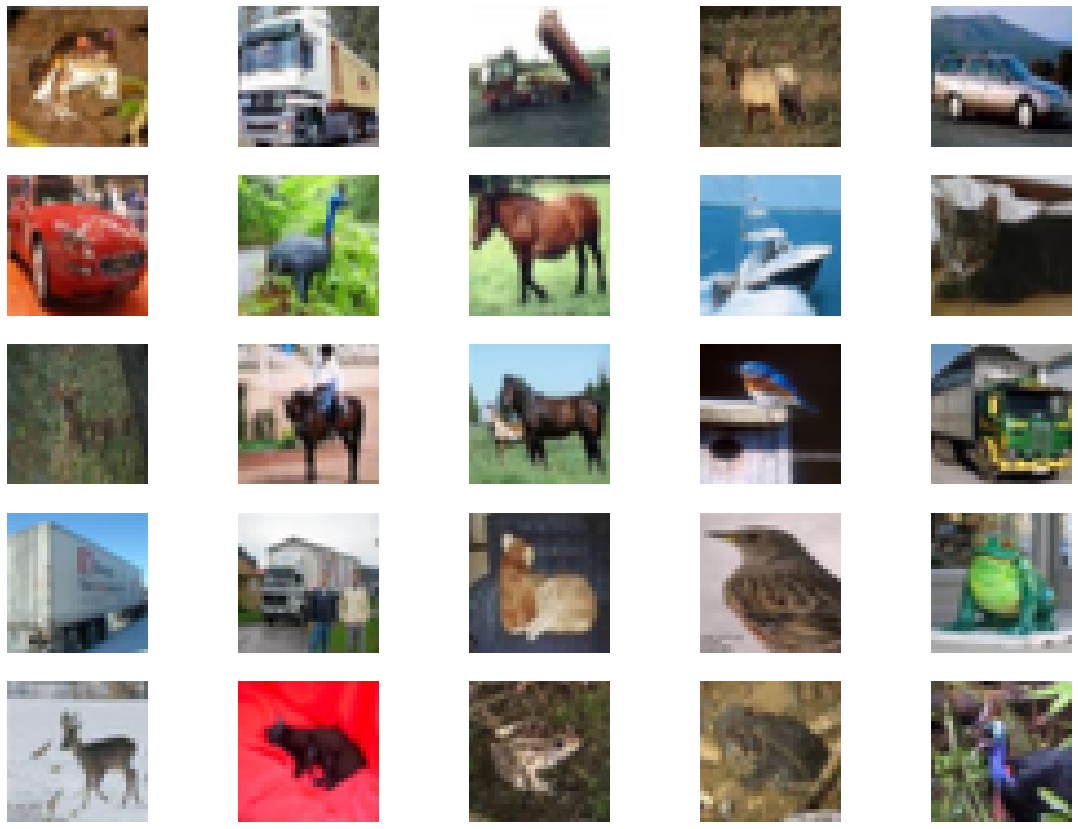

['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat', 'deer', 'horse', 'horse', 'bird', 'truck', 'truck', 'truck', 'cat', 'bird', 'frog', 'deer', 'cat', 'frog', 'frog', 'bird']


In [ ]:
#Display n random images:

def display_imgs(n_imgs, img_dat):
  plt.figure()
  fig, ax = plt.subplots(n_imgs, n_imgs, figsize= (20,15))
  for i in range(n_imgs):
    for j in range(n_imgs):
      ax[i,j].imshow(img_dat[j + i*n_imgs], interpolation='nearest')
      ax[i,j].set_axis_off()
  plt.savefig("Example_100_imgs_CIFAR10.png", bbox_inches='tight')
  plt.show()

#display_imgs(10, image_data_rgb_1)

#To check if the merge data was succesfull by checking that picture corresponds to label:"""
display_imgs(5, td_img)
print(label_names[:25])

In [ ]:
#Splitting dataset into training set
from sklearn.model_selection import train_test_split

#The real split of the dataset, using 10 % for validation and 10 % for testing:

td = np.array(td)
tl = np.array(tl)
img_train, img_temp, labels_train, labels_temp = train_test_split(td, tl, test_size = 0.20, shuffle=True)
img_validation, img_test, labels_validation, labels_test = train_test_split(img_temp, labels_temp, test_size = 0.50, shuffle=True)
print("Shape of training data", img_train.shape)
print("Shape of validation data", img_validation.shape, "Shape of tests data", img_test.shape)

Shape of training data (48000, 3072)
Shape of validation data (6000, 3072) Shape of tests data (6000, 3072)


In [ ]:
#Importing classifier
from sklearn.ensemble import RandomForestClassifier
import time

""" The main parameters to adjust when using these methods is n_estimators and max_features. 
The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. 
In addition, note that results will stop getting significantly better beyond a critical number of trees. 
The latter is the size of the random subsets of features to consider when splitting a node. 
The lower the greater the reduction of variance, but also the greater the increase in bias (makes it prone to overfit). 
Empirical good default values are max_features=None (always considering all features instead of a random subset)
for regression problems, and max_features="sqrt" (using a random subset of size sqrt(n_features)) 
for classification tasks (where n_features is the number of features in the data). 
Good results are often achieved when setting max_depth=None in combination with min_samples_split=2 (i.e., when fully developing the trees). 
Bear in mind though that these values are usually not optimal, and might result in models that consume a lot of RAM. 
The best parameter values should always be cross-validated. 
In addition, note that in random forests, bootstrap samples are used by default (bootstrap=True) 
while the default strategy for extra-trees is to use the whole dataset (bootstrap=False). 
When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples. 
This can be enabled by setting oob_score=True. """

score_lst = []
#from breiman's original paper: An important question is how many features to select at
#each node
# goal: finding n_estimator critical point (where adding more trees doesnt improve the prediction any more)
# best n_est so far is 340
#Using entropy gives a better accuracy but is more computationally heavy 
#because a logarithmic operation is more computationally heavy 
#than arithemetic operations which the only mathematical operation used in gini impurity
# oob score is set to True to give an score of the oob error rate
# n_jobs = -1 means that all that the classifier is usin gall processors
#,ax_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
st = time.time()
RF_clf = RandomForestClassifier(n_estimators = 340,
                                criterion='entropy', 
                                max_depth=None, 
                                min_samples_split= 2, 
                                min_samples_leaf = 1, 
                                min_weight_fraction_leaf = 0.0, 
                                max_features = 'sqrt',
                                max_leaf_nodes = None,
                                min_impurity_decrease = 0.0,  
                                min_impurity_split = None,
                                oob_score = True,
                                n_jobs = -1,
                                random_state = None,
                                verbose = 0,
                                warm_start = False,
                                bootstrap=True)
RF_clf.fit(img_train, labels_train)
et = time.time() - st

In [ ]:
#Predicted classes and score:
import sklearn.model_selection

pred_classes = np.array(RF_clf.predict(img_test))
score_pred = RF_clf.score(img_test, labels_test)
cross_val_score_pred = sklearn.model_selection.cross_val_score(RF_clf, img_test, labels_test, n_jobs=-1, cv=3)

#Prints number of featurs used:
print("Number of features considered when fitting:", RF_clf.n_features_)

#Prints oob-score which is proven to be an unbiased error estimate and mean accuracy
oob_score_rfcl = RF_clf.oob_score_
print("out of bag-score:", oob_score_rfcl)
oob_decision_func = RF_clf.oob_decision_function_ 

KeyboardInterrupt: ignored

In [ ]:
if np.isnan(np.sum(oob_decision_func)):
  print("If n_estimators is small it might be possible that a data point was never left out during the bootstrap.")
print("Mean accuracy on the given test data and labels:", score_pred)
print("Cross value on the given test data and labels:", cross_val_score_pred)

print("Time used:",int(et/3600), "hours, ", int((et - 3600*int(et/3600))/60), "minutes, ", et - 3600*int(et/3600) - int(60*int((et - 3600*int(et/3600))/60)), "seconds, ")

Mean accuracy on the given test data and labels: 0.4801666666666667
Cross value on the given test data and labels: [0.4155 0.4035 0.406 ]
Time used: 0 hours,  26 minutes,  20.41624426841736 seconds, 


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


The mean accuracy: 0.4801666666666667
The cross value scores: [0.4155 0.4035 0.406 ]

 The confusion matrix: 
 [[0.54036244 0.06260297 0.04448105 0.01317957 0.02635914 0.01976936
  0.03459638 0.02800659 0.17298188 0.05766063]
 [0.02090032 0.52572347 0.00321543 0.02893891 0.02411576 0.02090032
  0.04823151 0.04019293 0.06913183 0.21864952]
 [0.10419907 0.04510109 0.2970451  0.04199067 0.20217729 0.06842924
  0.12286159 0.05754277 0.04354588 0.01710731]
 [0.05246423 0.04292528 0.0508744  0.27027027 0.08108108 0.20667727
  0.14308426 0.05246423 0.02066773 0.07949126]
 [0.0487395  0.02016807 0.10588235 0.03361345 0.42521008 0.04705882
  0.17478992 0.07563025 0.0302521  0.03865546]
 [0.0385289  0.02977233 0.05429072 0.10858144 0.08406305 0.42732049
  0.13309982 0.07005254 0.01401051 0.04028021]
 [0.01386482 0.03639515 0.06585789 0.04852686 0.10225303 0.05025997
  0.62391681 0.02079723 0.00866551 0.02946274]
 [0.04607509 0.03583618 0.03754266 0.03924915 0.12627986 0.06313993
  0.06996587 0.4

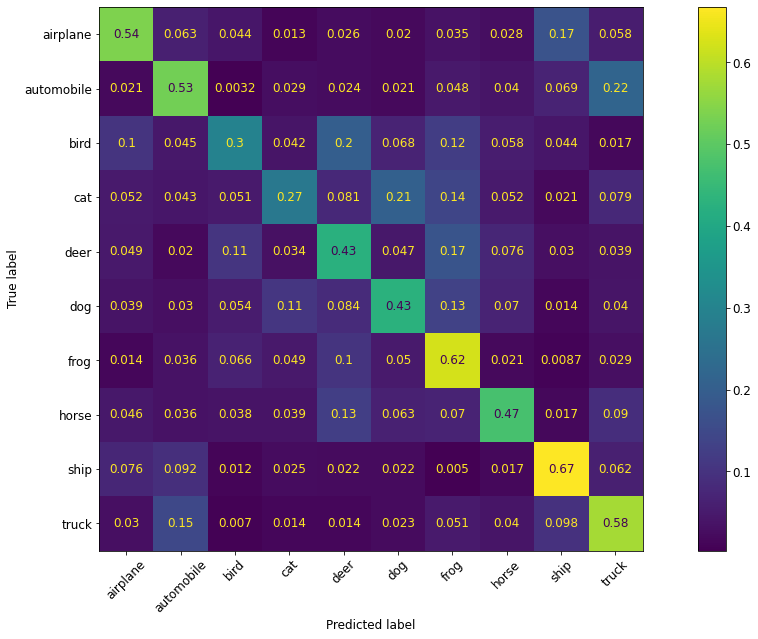

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import rc

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

fig, ax = plt.subplots(figsize=(20, 10))
plot_cm = plot_confusion_matrix(RF_clf, img_test, labels_test, display_labels=c10_label_names, normalize='true', ax=ax)
ax.set_xticklabels(c10_label_names, rotation=45 )
print("The mean accuracy:", score_pred)
print("The cross value scores:", cross_val_score_pred)
print("\n The confusion matrix: \n", plot_cm.confusion_matrix)

In [ ]:
#Computing ROC AUC curves by binarize the output
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
#Since were using the oob decision function we use the training labels as the test labels
print("The shape of the out of bag decision function:\n", oob_decision_func.shape)
print("\nThe out of bag decision function:\n",oob_decision_func)

y_bin = label_binarize(labels_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print("Shape y_bin:", y_bin.shape)
print("y_bin:\n", y_bin)
print(labels_train)
print(set(labels_train))
n_classes = y_bin.shape[1]
print(n_classes)

#Computing ROC AUC for each class
fp_rate = {}
tp_rate = {}
ROC_AUC = {}
thresholds = {}

for i in range(n_classes):
  fp_rate[i], tp_rate[i], thresholds[i] = roc_curve(y_bin[:, i], oob_decision_func[:,i])
  ROC_AUC[i] = auc(fp_rate[i], tp_rate[i])

# Compute micro-average ROC curve and ROC area
fp_rate["micro"], tp_rate["micro"], thresholds["micro"] = roc_curve(y_bin.ravel(), oob_decision_func.ravel())
#Computes area under curve using the trapedzoidal rule
ROC_AUC["micro"] = auc(fp_rate["micro"], tp_rate["micro"])

print("Thresholds:\n")
print(thresholds)

The shape of the out of bag decision function:
 (48000, 10)

The out of bag decision function:
 [[0.0390625  0.0625     0.1640625  ... 0.0703125  0.0859375  0.0234375 ]
 [0.024      0.144      0.08       ... 0.056      0.064      0.088     ]
 [0.03787879 0.17424242 0.03030303 ... 0.13636364 0.12121212 0.25757576]
 ...
 [0.08510638 0.34751773 0.04255319 ... 0.04255319 0.16312057 0.14893617]
 [0.07758621 0.19827586 0.05172414 ... 0.06896552 0.0862069  0.13793103]
 [0.4962406  0.15789474 0.06015038 ... 0.         0.12030075 0.09022556]]
Shape y_bin: (48000, 10)
y_bin:
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]
[9 3 9 ... 1 8 0]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
Thresholds:

{0: array([1.96183206, 0.96183206, 0.9516129 , ..., 0.00653595, 0.00625   ,
       0.        ]), 1: array([1.88549618, 0.88549618, 0.64      , ..., 0.00657895, 0.00613497,
       0.        ]), 2: array([1.60606061, 0.60606061, 0.55813953, ...

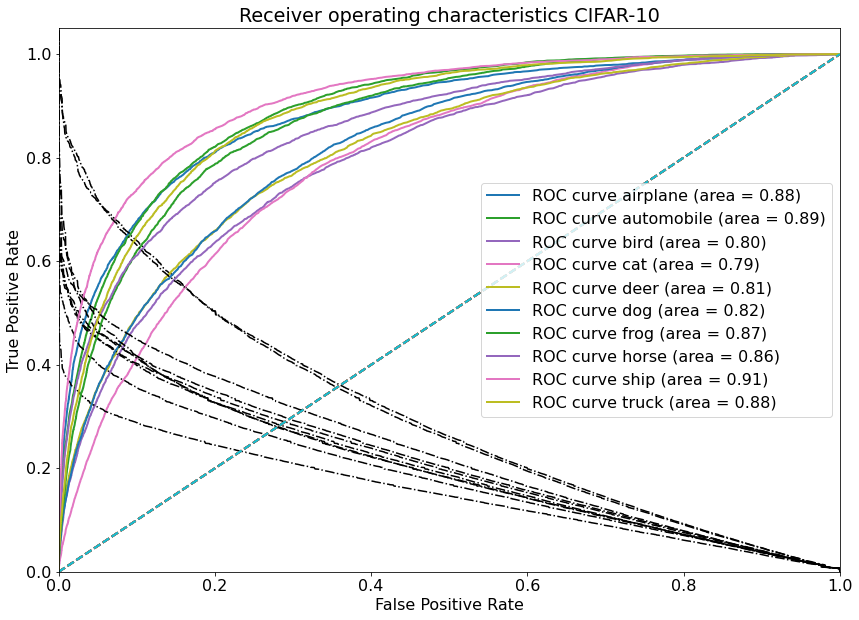

'# First aggregate all false positive rates\nall_fpr = np.unique(np.concatenate([fp_rate[i] for i in range(n_classes)]))\n\n# Then interpolate all ROC curves at this points\nmean_tpr = np.zeros_like(all_fpr)\nfor i in range(n_classes-1):\n    mean_tpr += interp(all_fpr, fp_rate[i], tp_rate[i])\n\n\n# Finally average it and compute AUC\nmean_tpr /= n_classes\nfp_rate["macro"] = all_fpr\ntp_rate["macro"] = mean_tpr\ntpr_lower = tp_rate["macro"] - np.std(tp_rate["macro"])\ntpr_upper = tp_rate["macro"] + np.std(tp_rate["macro"])\nprint(tpr_lower)\nprint(tpr_upper)\n\nROC_AUC["macro"] = auc(fp_rate["macro"], tp_rate["macro"])\n\nplt.figure(figsize=(14,10))\nplt.plot(fp_rate["macro"] , tp_rate["macro"], \'r-\')\nplt.fill_between(tp_rate["macro"], tpr_lower, tpr_upper, color=\'grey\', alpha=.2, label=r\'$\\pm$ 1 std. dev.\')\nplt.show()'

In [ ]:
#Plotting the ROC AUC
from matplotlib import rc
from numpy import interp

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

rc('font', **font)

plt.figure(figsize=(14,10))
for i in range(10):
  #Choosing linewidth
  lw = 2
  if i == 10:
    plt.plot(fp_rate["micro"], tp_rate["micro"], lw=lw, label='ROC curve micro (area = %0.2f)' % ROC_AUC["micro"])
    plt.plot(np.linspace(0,1, len(thresholds["micro"])), thresholds["micro"], 'k-.', label='Thresholds')
  else:
    plt.plot(fp_rate[i], tp_rate[i], lw=lw, label='ROC curve ' + c10_label_names[i] + ' (area = %0.2f)' % ROC_AUC[i])
    plt.plot(np.linspace(0,1, len(thresholds[i])), thresholds[i], 'k-.')
  plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristics CIFAR-10')
  plt.legend(loc="best")
plt.show()


"""# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fp_rate[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes-1):
    mean_tpr += interp(all_fpr, fp_rate[i], tp_rate[i])


# Finally average it and compute AUC
mean_tpr /= n_classes
fp_rate["macro"] = all_fpr
tp_rate["macro"] = mean_tpr
tpr_lower = tp_rate["macro"] - np.std(tp_rate["macro"])
tpr_upper = tp_rate["macro"] + np.std(tp_rate["macro"])
print(tpr_lower)
print(tpr_upper)

ROC_AUC["macro"] = auc(fp_rate["macro"], tp_rate["macro"])

plt.figure(figsize=(14,10))
plt.plot(fp_rate["macro"] , tp_rate["macro"], 'r-')
plt.fill_between(tp_rate["macro"], tpr_lower, tpr_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.show()"""

In [ ]:
#Checking the change in mean accuracy with respect to the in
# Default is sqrt(number of features)
# N estimators set to 10 for faster computation time, goal here is to see trend with change in max features
score_lst = []
for i in range(10,100, 10):
  RF_clf = RandomForestClassifier(n_estimators = 340,
                                  criterion='entropy', 
                                  max_depth=None, 
                                  min_samples_split= 2, 
                                  min_samples_leaf = 1, 
                                  min_weight_fraction_leaf = 0.0, 
                                  max_features = int((i/100)*np.sqrt(len(img_train[0]))),
                                  max_leaf_nodes = None,
                                  min_impurity_decrease = 0.0,  
                                  min_impurity_split = None,
                                  oob_score = True,
                                  n_jobs = -1,
                                  random_state = None,
                                  verbose = 0,
                                  warm_start = False,
                                  bootstrap=True)
  RF_clf.fit(img_train, labels_train)

  pred_classes = np.array(RF_clf.predict(img_test))
  score_pred = RF_clf.score(img_validation, labels_validation)
  score_lst.append(np.array([i, score_pred, RF_clf.oob_score_]))
  print("Mean accuracy on the given test data and labels:", score_pred)

Mean accuracy on the given test data and labels: 0.4651666666666667
Mean accuracy on the given test data and labels: 0.4735
Mean accuracy on the given test data and labels: 0.4775
Mean accuracy on the given test data and labels: 0.47633333333333333
Mean accuracy on the given test data and labels: 0.4795
Mean accuracy on the given test data and labels: 0.48083333333333333
Mean accuracy on the given test data and labels: 0.4736666666666667
Mean accuracy on the given test data and labels: 0.4821666666666667
Mean accuracy on the given test data and labels: 0.47533333333333333


[[10.          0.46516667  0.44933333]
 [20.          0.4735      0.45639583]
 [30.          0.4775      0.4575    ]
 [40.          0.47633333  0.45879167]
 [50.          0.4795      0.45910417]
 [60.          0.48083333  0.46002083]
 [70.          0.47366667  0.464625  ]
 [80.          0.48216667  0.46258333]
 [90.          0.47533333  0.46447917]]


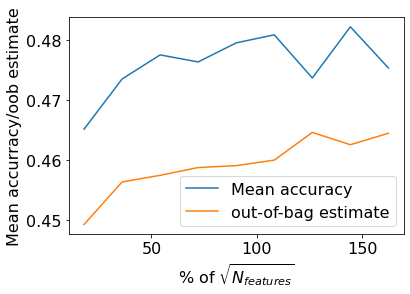

In [ ]:
score_lst = np.array(score_lst)
print(score_lst)

plt.figure()
plt.plot(100*score_lst[:,0]/np.sqrt(RF_clf.n_features_), score_lst[:,1], label='Mean accuracy')
plt.plot(100*score_lst[:,0]/np.sqrt(RF_clf.n_features_), score_lst[:,2], label= 'out-of-bag estimate')
plt.xlabel('% of $\sqrt{N_{features}}$')
plt.ylabel('Mean accurracy/oob estimate')
plt.legend()
plt.show()

In [ ]:
#Checking the change in mean accuracy with respect to the increase in the number of estimators
score_lst = []
for i in range(1, 500, 50):
  RF_clf = RandomForestClassifier(n_estimators = i,
                                  criterion='entropy', 
                                  max_depth=None, 
                                  min_samples_split= 2, 
                                  min_samples_leaf = 1, 
                                  min_weight_fraction_leaf = 0.0, 
                                  max_features = 'auto',
                                  max_leaf_nodes = None,
                                  min_impurity_decrease = 0.0,  
                                  min_impurity_split = None,
                                  oob_score = True,
                                  n_jobs = -1,
                                  random_state = None,
                                  verbose = 0,
                                  warm_start = False,
                                  bootstrap=True)
  RF_clf.fit(img_train, labels_train)
  score_pred = RF_clf.oob_score_
  score_lst.append(np.array([i, score_pred, RF_clf.oob_score_]))
  print("Mean accuracy on the given test data and labels:", score_pred)

In [ ]:
score_lst = np.array(score_lst)
print(score_lst)

plt.figure()
plt.plot(score_lst[:,0], score_lst[:,1])
plt.xlabel('$N_{estimator}$ - # of trees in forest')
plt.ylabel('Mean accurracy')
plt.show()

plt.figure()
plt.plot(score_lst[:,0], 1- score_lst[:,2])
plt.xlabel('$N_{estimator}$ - # of trees in forest')
plt.ylabel('Oob error estimate')
plt.show()

In [ ]:
#Installing optuna to optimize hyperparameters
!pip install optuna

     |████████████████████████████████| 266kB 5.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 163kB 15.4MB/s 
     |████████████████████████████████| 112kB 17.7MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 133kB 15.8MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
  Created wheel for optuna: filename=optuna-2.3.0-cp36-none-any.whl size=359761 sha256=54bfe3fa9181fe81f5668f56893db1ba6ad96cf9901cbaab62d2056912541461
  Stored in directory: /root/.cache/pip/wheels/fa/91/19/64b0ec6b964f89c0695a9dc6db6f851d0b54c5381a5c9cadfb
Successfully built optuna
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=ac8859f93754a9b97b0868af9d357e66c1bb1508529385e595ec617e63484143
  Stored in directory: /root/.cache/pip/whe

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier

def objective_oob(trial):    
    min_s_ln = trial.suggest_int('min_samples_leaf', 1, 100)
    max_feat = trial.suggest_int('max_features', int(.1*np.sqrt(len(img_train[0]))), int(2*np.sqrt(len(img_train[0]))), log=True)
    md = trial.suggest_int('max_depth', 50, 600, log=True)
    min_split = trial.suggest_int('min_samples_split', 2, 50)
                  
    
    clf = RandomForestClassifier(
        n_estimators=340,
        max_depth=md,
        min_samples_split=min_split,
        min_samples_leaf = min_s_ln,
        max_features = max_feat,
        oob_score = True,
        n_jobs = -1
        )
    clf.fit(img_train, labels_train)
    oob_score = clf.oob_score_
    return oob_score

study_oob = optuna.create_study(direction='maximize')
study_oob.optimize(objective_oob, n_trials=100)

[I 2020-11-25 10:09:48,769] A new study created in memory with name: no-name-d4f84eba-a6cf-46a9-b363-3d8cc5c090ba
[I 2020-11-25 10:10:58,313] Trial 0 finished with value: 0.39560416666666665 and parameters: {'min_samples_leaf': 76, 'max_features': 8, 'max_depth': 541, 'min_samples_split': 32}. Best is trial 0 with value: 0.39560416666666665.
[I 2020-11-25 10:12:39,083] Trial 1 finished with value: 0.43045833333333333 and parameters: {'min_samples_leaf': 17, 'max_features': 10, 'max_depth': 75, 'min_samples_split': 49}. Best is trial 1 with value: 0.43045833333333333.
[I 2020-11-25 10:16:46,634] Trial 2 finished with value: 0.433125 and parameters: {'min_samples_leaf': 28, 'max_features': 33, 'max_depth': 231, 'min_samples_split': 28}. Best is trial 2 with value: 0.433125.
[I 2020-11-25 10:23:33,042] Trial 3 finished with value: 0.433875 and parameters: {'min_samples_leaf': 31, 'max_features': 58, 'max_depth': 70, 'min_samples_split': 40}. Best is trial 3 with value: 0.433875.
[I 2020-1

In [ ]:
trial_oob = study_oob.best_trial

print('Accuracy: {}'.format(1 - trial_oob.value))
print("Best hyperparameters: {}".format(trial_oob.params))

In [ ]:
best_hyperparams = trial_oob.params
print(best_hyperparams)

RFclf = sklearn.ensemble.RandomForestClassifier(
        max_depth=best_hyperparams['max_depth'],
        min_samples_split=best_hyperparams['min_samples_split'],
        min_samples_leaf = best_hyperparams['min_samples_leaf'],
        max_features = best_hyperparams['max_features'],
        oob_score = True,
        n_jobs = -1
        )

RFclf.fit(img_train, labels_train)
oob_score_best = RFclf.oob_score_
print("Oob estimate:",oob_score_best)

In [ ]:
optuna.visualization.plot_optimization_history(study_oob)

In [ ]:
optuna.visualization.plot_slice(study_oob)

In [ ]:
optuna.visualization.plot_contour(study_oob, params=['max_depth', 'max_features'])

In [ ]:
optuna.visualization.plot_contour(study_oob, params=['min_samples_leaf', 'max_features'])

In [ ]:
optuna.visualization.plot_contour(study_oob, params=['min_samples_split', 'max_features'])

In [ ]:
def objective_oob(trial):    
    min_s_ln = trial.suggest_int('min_samples_leaf', 1, 100)
    max_feat = trial.suggest_int('max_features', int(.1*np.sqrt(len(img_train[0]))), int(2*np.sqrt(len(img_train[0]))), log=True)
    md = trial.suggest_int('max_depth', 50, 600, log=True)
    min_split = trial.suggest_int('min_samples_split', 2, 50)
                  
    
    clf = RandomForestClassifier(
        n_estimators=340,
        max_depth=md,
        min_samples_split=min_split,
        min_samples_leaf = min_s_ln,
        max_features = max_feat,
        oob_score = True,
        n_jobs = -1
        )
    clf.fit(img_train, labels_train)
    mean_acc = RF_clf.score(img_test, labels_test)
    return mean_acc

study_ma = optuna.create_study(direction='maximize')
study_ma.optimize(objective_oob, n_trials=100)

In [ ]:
trial_ma = study_oob.best_trial

print('Accuracy: {}'.format(1 - trial_ma.value))
print("Best hyperparameters: {}".format(trial_ma.params))

best_hyperparams_ma = trial_ma.params
print(best_hyperparams_ma)

In [ ]:
RFclf_maoptim = sklearn.ensemble.RandomForestClassifier(
        max_depth=best_hyperparams['max_depth'],
        min_samples_split=best_hyperparams['min_samples_split'],
        min_samples_leaf = best_hyperparams['min_samples_leaf'],
        max_features = best_hyperparams['max_features'],
        oob_score = True,
        n_jobs = -1
        )

RFclf_maoptim.fit(img_train, labels_train)
mean_acc_optim = RFclf_maoptim.score(img_test, labels_test)
print("Oob estimate:",mean_acc_optim)

In [ ]:
optuna.visualization.plot_optimization_history(study_oob)

In [ ]:
optuna.visualization.plot_slice(study_oob)

In [ ]:
optuna.visualization.plot_contour(study_oob, params=['max_depth', 'max_features'])

In [ ]:
optuna.visualization.plot_contour(study_oob, params=['min_samples_leaf', 'max_features'])

In [ ]:
optuna.visualization.plot_contour(study_oob, params=['min_samples_split', 'max_features'])

In [ ]:
#Visualizing a given tree in the forest:

from sklearn.tree import export_graphviz
# Export as dot file
estimator = RF_clf.estimators_[1]

export_graphviz(estimator, out_file='tree_0.dot',
                class_names = c10_label_names,
                rounded = True,
                proportion = False, 
                precision = 2,
                filled = True,
                impurity = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_0.dot', '-o', 'tree_0.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_0.png', width= 1000, height=1000)